####Imports

In [32]:
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, Dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

###EDA  - Dog Breed Dataset

####Overview of Data
* There are **total 20580** images in the dataset.
* Total **120 labels (breeds)** available in the dataset.  
* Approx **150 images per class**.

**Train** 
*   Consists of **12000** datapoints
*   Train dataset is balanced - every label has 99 datasets.

**Test** 
* Remaining **8580 images** are used for testing.

In [ ]:
PATH ='/Dataset/'
dataset = ImageFolder(PATH+'images/Images')
dataset

Dataset ImageFolder
    Number of datapoints: 20580
    Root location: /content/drive/MyDrive/Dataset/DogBreed/images/Images

In [ ]:
print("Classes",len(dataset.classes))
dataset.classes[:5]

Classes 120


['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu']

In [ ]:
dataset.imgs[0][0]

'/content/drive/MyDrive/Dataset/DogBreed/images/Images/n02085620-Chihuahua/n02085620_10074.jpg'

In [ ]:
' '.join(''.join('n02085782-Japanese_spaniel'.split('-')[1:]).split('_')).lower()  #_ or - Shih-Tzu

'japanese spaniel'

In [ ]:
def format_class(name):
  new_name = ' '.join(''.join(name.split('-')[1:]).split('_')).lower()
  return new_name

breeds = []
for n in dataset.classes:
    breeds.append(format_class(n))
len(breeds)

120

In [ ]:
breeds

['chihuahua',
 'japanese spaniel',
 'maltese dog',
 'pekinese',
 'shihtzu',
 'blenheim spaniel',
 'papillon',
 'toy terrier',
 'rhodesian ridgeback',
 'afghan hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'blackandtan coonhound',
 'walker hound',
 'english foxhound',
 'redbone',
 'borzoi',
 'irish wolfhound',
 'italian greyhound',
 'whippet',
 'ibizan hound',
 'norwegian elkhound',
 'otterhound',
 'saluki',
 'scottish deerhound',
 'weimaraner',
 'staffordshire bullterrier',
 'american staffordshire terrier',
 'bedlington terrier',
 'border terrier',
 'kerry blue terrier',
 'irish terrier',
 'norfolk terrier',
 'norwich terrier',
 'yorkshire terrier',
 'wirehaired fox terrier',
 'lakeland terrier',
 'sealyham terrier',
 'airedale',
 'cairn',
 'australian terrier',
 'dandie dinmont',
 'boston bull',
 'miniature schnauzer',
 'giant schnauzer',
 'standard schnauzer',
 'scotch terrier',
 'tibetan terrier',
 'silky terrier',
 'softcoated wheaten terrier',
 'west highland white t

0  :  chihuahua


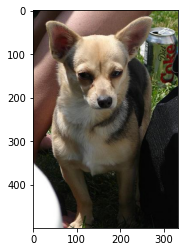

In [ ]:
plt.imshow(mpimg.imread(dataset.imgs[0][0]))
print(dataset.imgs[0][1], " : ", breeds[dataset.imgs[0][1]] )

In [34]:
len(dataset.imgs)

20580

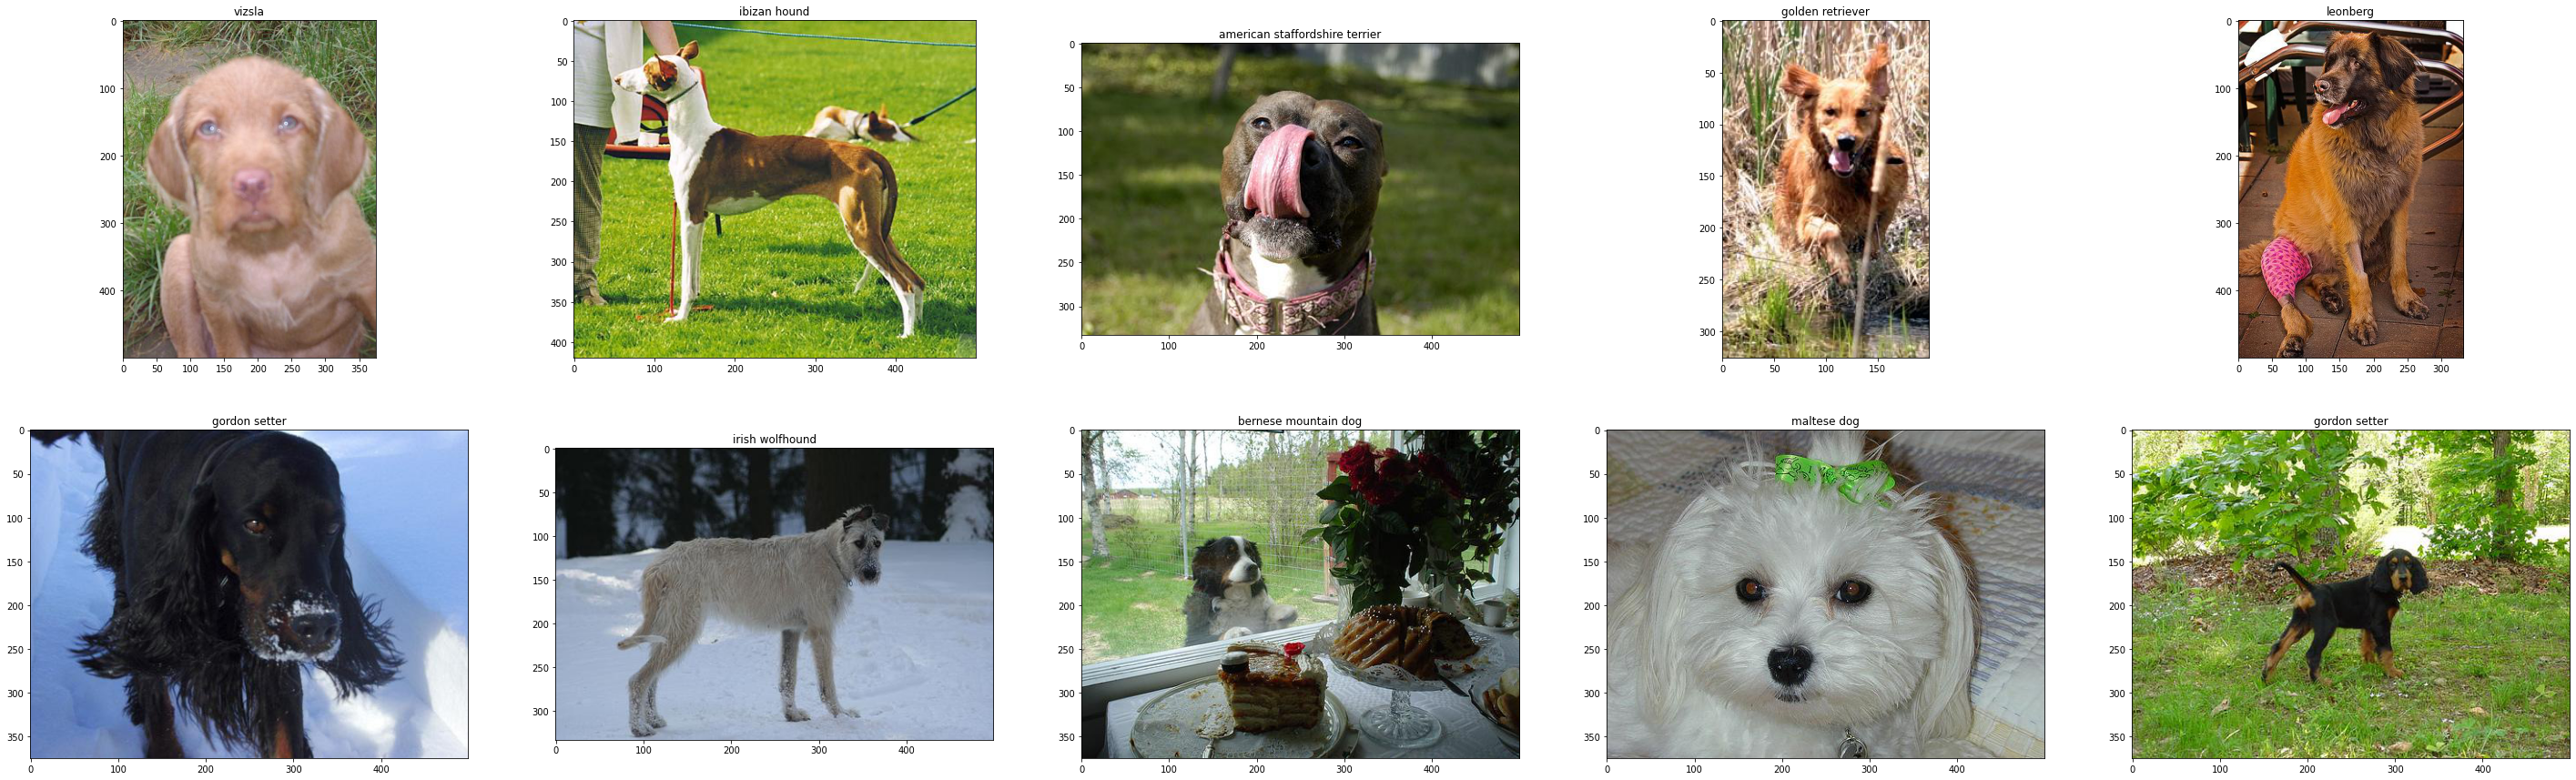

In [40]:
fig = plt.figure(figsize=(50, 15))
for i in range(10):
  i = i + 1
  t = random.randint(0,20579)
  fig.add_subplot(2,5, i)
  plt.imshow(mpimg.imread(dataset.imgs[t][0]))
  plt.title(breeds[dataset.imgs[t][1]])

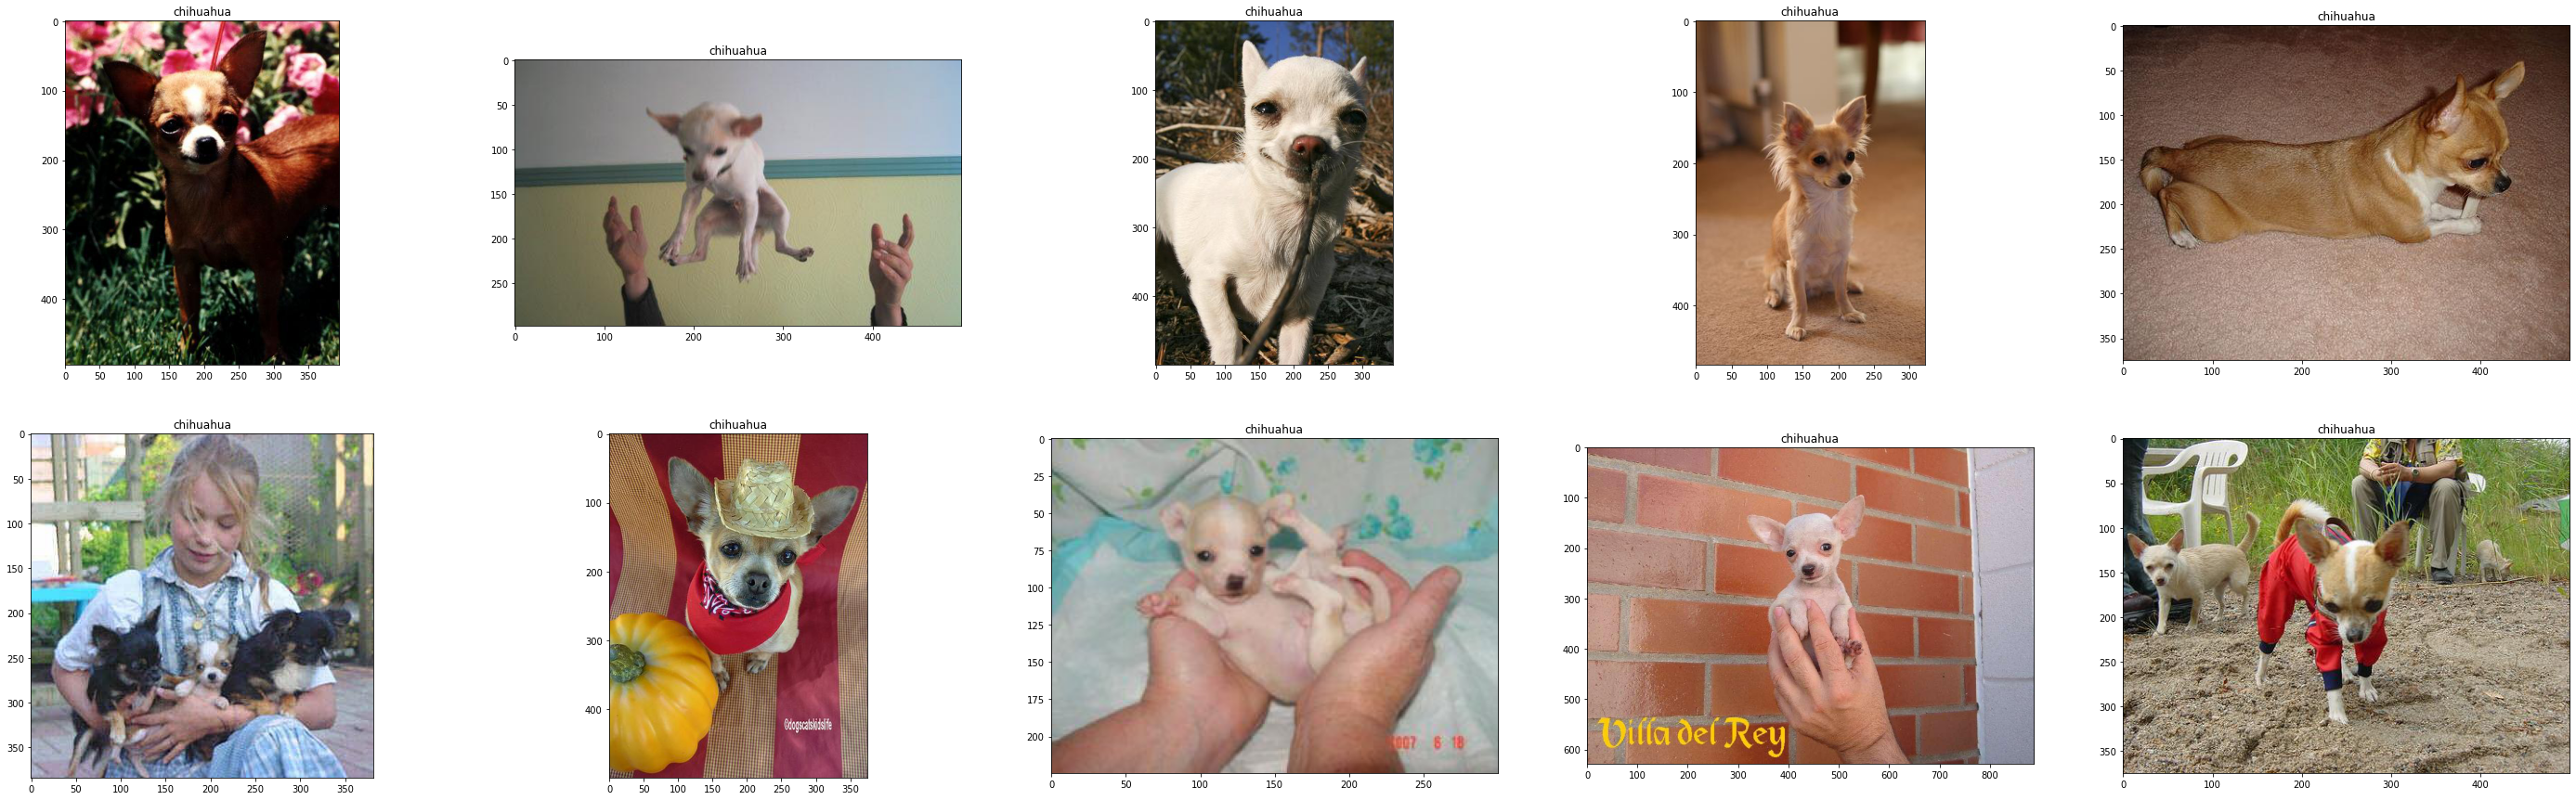

In [41]:
#Same Breed
fig = plt.figure(figsize=(50, 15))
for i in range(10):
  i = i + 1
  fig.add_subplot(2,5, i)
  plt.imshow(mpimg.imread(dataset.imgs[i][0]))
  plt.title(breeds[dataset.imgs[i][1]])

{'chihuahua': 152, 'japanese spaniel': 185, 'maltese dog': 252, 'pekinese': 149, 'shihtzu': 214, 'blenheim spaniel': 188, 'papillon': 196, 'toy terrier': 172, 'rhodesian ridgeback': 172, 'afghan hound': 239, 'basset': 175, 'beagle': 195, 'bloodhound': 187, 'bluetick': 171, 'blackandtan coonhound': 159, 'walker hound': 153, 'english foxhound': 157, 'redbone': 148, 'borzoi': 151, 'irish wolfhound': 218, 'italian greyhound': 182, 'whippet': 187, 'ibizan hound': 188, 'norwegian elkhound': 196, 'otterhound': 151, 'saluki': 200, 'scottish deerhound': 232, 'weimaraner': 160, 'staffordshire bullterrier': 155, 'american staffordshire terrier': 164, 'bedlington terrier': 182, 'border terrier': 172, 'kerry blue terrier': 179, 'irish terrier': 169, 'norfolk terrier': 172, 'norwich terrier': 185, 'yorkshire terrier': 164, 'wirehaired fox terrier': 157, 'lakeland terrier': 197, 'sealyham terrier': 202, 'airedale': 202, 'cairn': 197, 'australian terrier': 196, 'dandie dinmont': 180, 'boston bull': 18

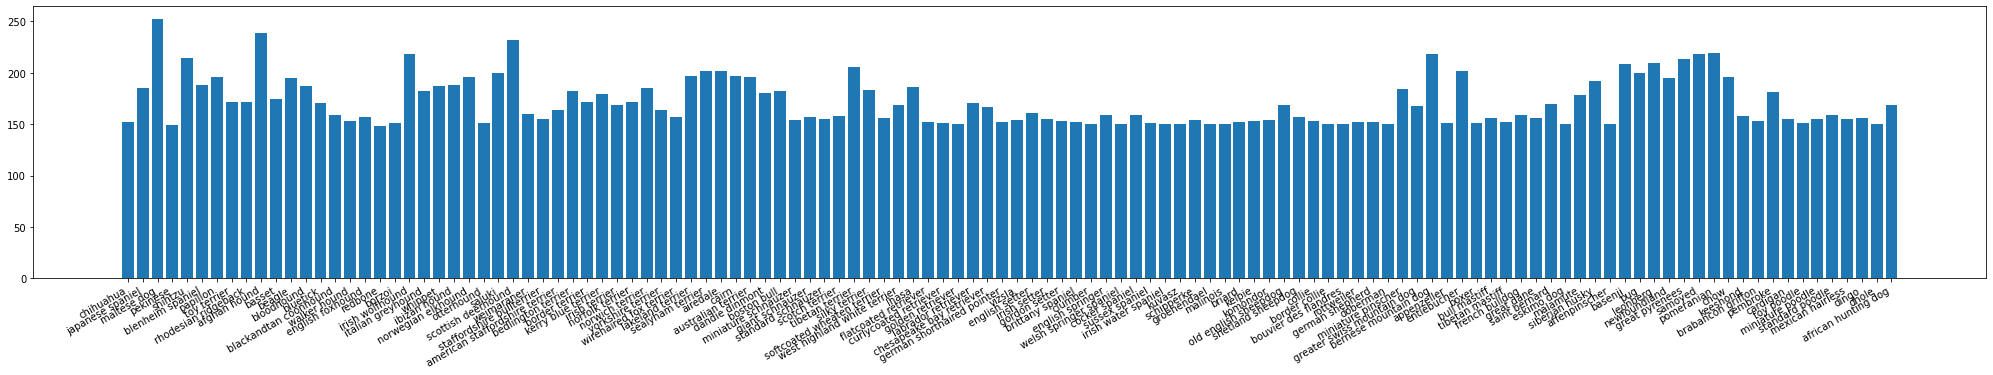

In [ ]:
#distribution of data over classes
from collections import Counter
breed_freq = dict(Counter(dataset.targets))
#print(breed_freq)
i=0
for b in breeds:
  breed_freq[b] = breed_freq.pop(i)
  i += 1
print(breed_freq)

plt.figure(figsize=(35, 5))
plt.bar(list(breed_freq.keys()), breed_freq.values())
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
import scipy.io
mat = scipy.io.loadmat(PATH+'file_list.mat')
mat_test = scipy.io.loadmat(PATH+'test_list.mat')
mat_train = scipy.io.loadmat(PATH+'train_list.mat')

####Train Data

In [ ]:
print("Length of train data :", len(mat_train['file_list']))
mat_train.keys()

Length of train data : 12000


dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

{1: 99, 2: 99, 3: 99, 4: 99, 5: 99, 6: 99, 7: 99, 8: 99, 9: 99, 10: 99, 11: 99, 12: 99, 13: 99, 14: 99, 15: 99, 16: 99, 17: 99, 18: 99, 19: 99, 20: 99, 21: 99, 22: 99, 23: 99, 24: 99, 25: 99, 26: 99, 27: 99, 28: 99, 29: 99, 30: 99, 31: 99, 32: 99, 33: 99, 34: 99, 35: 99, 36: 99, 37: 99, 38: 99, 39: 99, 40: 99, 41: 99, 42: 99, 43: 99, 44: 99, 45: 99, 46: 99, 47: 99, 48: 99, 49: 99, 50: 99, 51: 99, 52: 99, 53: 99, 54: 99, 55: 99, 56: 99, 57: 99, 58: 99, 59: 99, 60: 99, 61: 99, 62: 99, 63: 99, 64: 99, 65: 99, 66: 99, 67: 99, 68: 99, 69: 99, 70: 99, 71: 99, 72: 99, 73: 99, 74: 99, 75: 99, 76: 99, 77: 99, 78: 99, 79: 99, 80: 99, 81: 99, 82: 99, 83: 99, 84: 99, 85: 99, 86: 99, 87: 99, 88: 99, 89: 99, 90: 99, 91: 99, 92: 99, 93: 99, 94: 99, 95: 99, 96: 99, 97: 99, 98: 99, 99: 99, 100: 99, 101: 99, 102: 99, 103: 99, 104: 99, 105: 99, 106: 99, 107: 99, 108: 99, 109: 99, 110: 99, 111: 99, 112: 99, 113: 99, 114: 99, 115: 99, 116: 99, 117: 99, 118: 99, 119: 99, 120: 99}


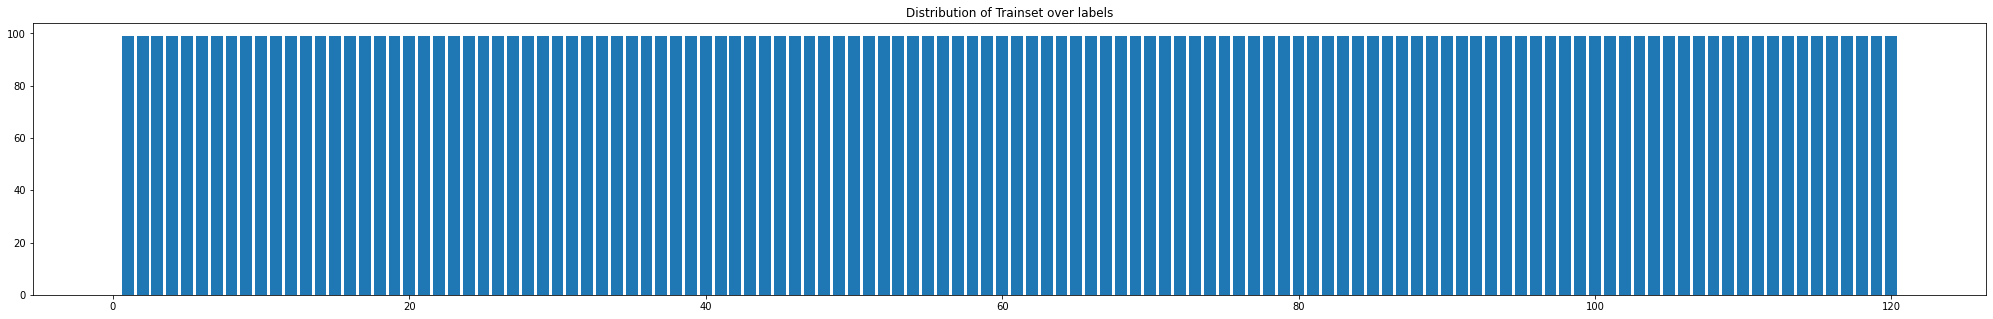

In [ ]:
train_data = {}
data = mat_train['labels'].ravel()
for i in range(len(data)):
  if data[i] not in train_data.keys():
    train_data[data[i]] = 0
  else :
    train_data[data[i]]  += 1
  
print(train_data)

plt.figure(figsize=(35, 5))
plt.bar(list(train_data.keys()), train_data.values())
plt.title("Distribution of Trainset over labels")
plt.show()

####Test Data

In [ ]:
print(mat_test.keys())
print("Length of test data :", len(mat_test['file_list']))

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])
Length of test data : 8580


{1: 51, 2: 84, 3: 151, 4: 48, 5: 113, 6: 87, 7: 95, 8: 71, 9: 71, 10: 138, 11: 74, 12: 94, 13: 86, 14: 70, 15: 58, 16: 52, 17: 56, 18: 47, 19: 50, 20: 117, 21: 81, 22: 86, 23: 87, 24: 95, 25: 50, 26: 99, 27: 131, 28: 59, 29: 54, 30: 63, 31: 81, 32: 71, 33: 78, 34: 68, 35: 71, 36: 84, 37: 63, 38: 56, 39: 96, 40: 101, 41: 101, 42: 96, 43: 95, 44: 79, 45: 81, 46: 53, 47: 56, 48: 54, 49: 57, 50: 105, 51: 82, 52: 55, 53: 68, 54: 85, 55: 51, 56: 50, 57: 49, 58: 70, 59: 66, 60: 51, 61: 53, 62: 60, 63: 54, 64: 52, 65: 51, 66: 49, 67: 58, 68: 49, 69: 58, 70: 50, 71: 49, 72: 49, 73: 53, 74: 49, 75: 49, 76: 51, 77: 52, 78: 53, 79: 68, 80: 56, 81: 52, 82: 49, 83: 49, 84: 51, 85: 51, 86: 49, 87: 83, 88: 67, 89: 117, 90: 50, 91: 101, 92: 50, 93: 55, 94: 51, 95: 58, 96: 55, 97: 69, 98: 49, 99: 77, 100: 91, 101: 49, 102: 108, 103: 99, 104: 109, 105: 94, 106: 112, 107: 117, 108: 118, 109: 95, 110: 57, 111: 52, 112: 80, 113: 54, 114: 50, 115: 54, 116: 58, 117: 54, 118: 55, 119: 49, 120: 68}


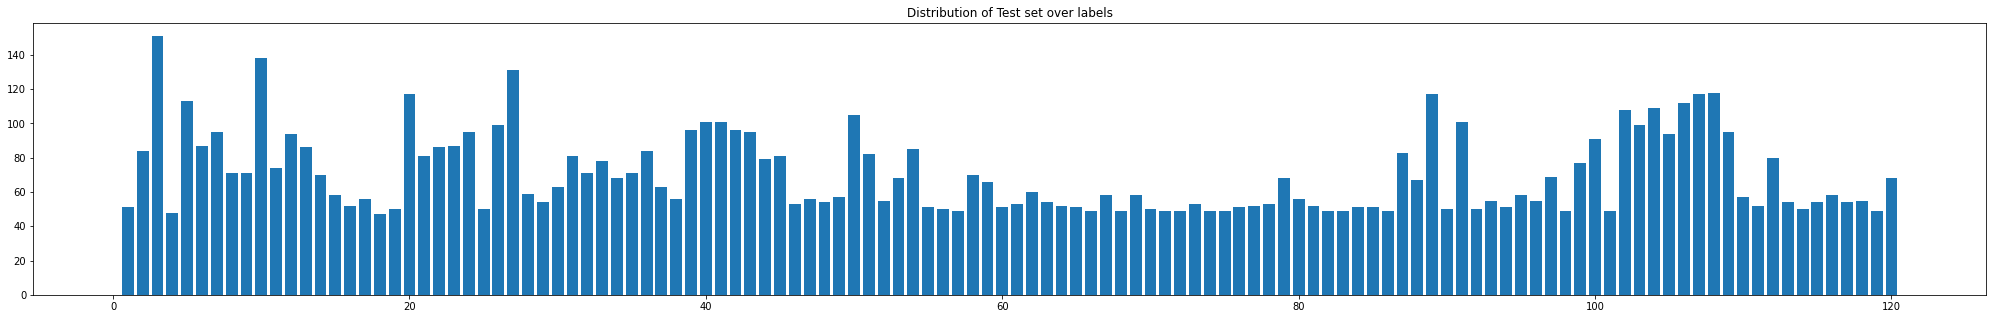

In [ ]:
test_data = {}
data = mat_test['labels'].ravel()
for i in range(len(data)):
  if data[i] not in test_data.keys():
    test_data[data[i]] = 0
  else :
    test_data[data[i]]  += 1
  
print(test_data)

plt.figure(figsize=(35, 5))
plt.bar(list(test_data.keys()), test_data.values())
plt.title("Distribution of Test set over labels")
plt.show()